# Gamer study : VFP task analysis

`
Created on Sun Dec 27 2019
Author: Francois R. Foerster
`

In [210]:
# Use MNE
%matplotlib qt
import numpy as np
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mne
from mne.event import define_target_events
from mne.baseline import rescale
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)

# Groups of subjects:
# NVGP: sub 1-2-4-5
# VGP: sub 3

# Load a set of epochs for each participant

In [203]:
# For one participant
nameFile = input("Please enter a name: ")

# Long VFP
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_VFPlong-epo.fif'
epochs_long = mne.read_epochs(myPath, preload=True)
epochs_long_Alpha = epochs_long.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)

# Short VFP
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_VFPshort-epo.fif'
epochs_short = mne.read_epochs(myPath, preload=True)
epochs_short_Alpha = epochs_short.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)

Please enter a name: sub6
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub6_VFPlong-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...    1098.00 ms
        0 CTF compensation matrices available
242 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)

Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub6_VFPshort-epo.fif ...
    Found the data of interest:

<ipython-input-203-c2063f874921>:12: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_short_Alpha = epochs_short.copy().filter(l_freq = 8, h_freq = 12)


## Build the evoked objects for a single participant

In [205]:
baseline = (-1., 0.)
method='median'

evoked_long_ERP = epochs_long.copy().apply_baseline(baseline=baseline).average(method=method)
evoked_short_ERP = epochs_short.copy().apply_baseline(baseline=baseline).average(method=method)

evoked_short_Alpha = epochs_short_Alpha.copy().apply_baseline(baseline=baseline).average(method=method)
evoked_long_Alpha = epochs_long_Alpha.copy().apply_baseline(baseline=baseline).average(method=method)

evoked_Tshort = epochs_short['Tshort'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_Nshort = epochs_short['Nshort'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_Tlong = epochs_long['Tlong'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_Nlong = epochs_long['Nlong'].copy().apply_baseline(baseline=baseline).average(method=method)

evoked_TshortSS = epochs_short['Tshort/SS'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_TshortLS = epochs_short['Tshort/LS'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_TlongSL = epochs_long['Tlong/SL'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_TlongLL = epochs_long['Tlong/LL'].copy().apply_baseline(baseline=baseline).average(method=method)

evoked_NshortSS = epochs_short['Nshort/SS'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_NshortLS = epochs_short['Nshort/LS'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_NlongSL = epochs_long['Nlong/SL'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_NlongLL = epochs_long['Nlong/LL'].copy().apply_baseline(baseline=baseline).average(method=method)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [206]:
epochs_short, epochs_long

(<EpochsFIF  |   218 events (all good), -1.1 - 0.498 sec, baseline [-1, 0], ~86.7 MB, data loaded,
  'Nshort/LS': 72
  'Nshort/SS': 40
  'Tshort/LS': 76
  'Tshort/SS': 30>,
 <EpochsFIF  |   242 events (all good), -1.1 - 1.098 sec, baseline [-1, 0], ~132.2 MB, data loaded,
  'Nlong/LL': 41
  'Nlong/SL': 78
  'Tlong/LL': 40
  'Tlong/SL': 83>)

### Subject-specific pre-analysis

In [207]:
# Plot ERPs 
vmin, vmax, size = (-20, 20, 0.5)
baseline = (-0.3, 0.)

## --- Short VFP

#mne.viz.plot(evoked_Tlong.crop(0,1), size = size, show=False, vmin=vmin, vmax=vmax, axes=axes[1])
#mne.viz.topomap.plot_evoked_topomap(evoked_Tlong.crop(0,1), size = size, show=False, vmin=vmin, vmax=vmax, axes=axes[1])


#epochs = epochs_short.crop(-0.4, 0.6)

plt.close('all')

epochs = epochs_short.copy().apply_baseline(baseline=baseline).crop(-.2, 0.4)
mne.viz.plot_epochs_image(epochs, ["C3"], sigma=1,
                          vmin=vmin, vmax=vmax, title = "400 ms C3")
mne.viz.plot_epochs_image(epochs, ["Oz"], sigma=1,
                          vmin=vmin, vmax=vmax, title = "400 ms Oz")


epochs = epochs_long.copy().apply_baseline(baseline=baseline).crop(-.2, 1)
mne.viz.plot_epochs_image(epochs, ["C3"], sigma=1,
                          vmin=vmin, vmax=vmax, title = "1000 ms C3")
mne.viz.plot_epochs_image(epochs, ["Oz"], sigma=1,
                          vmin=vmin, vmax=vmax, title = "1000 ms Oz")


# plt.figure()
# plt.plot(d[:100], label='signal')
# plt.plot(d_[:100], label='regenerated signal')
# plt.legend()

# plt.figure()
# plt.psd(d, Fs=raw.info['sfreq'], NFFT=2048)
# plt.psd(innovation, Fs=raw.info['sfreq'], NFFT=2048)
# plt.psd(d_, Fs=raw.info['sfreq'], NFFT=2048, linestyle='--')
# plt.legend(('Signal', 'Innovation', 'Regenerated signal'))
plt.show()


Applying baseline correction (mode: mean)
218 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
218 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Applying baseline correction (mode: mean)
242 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
242 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


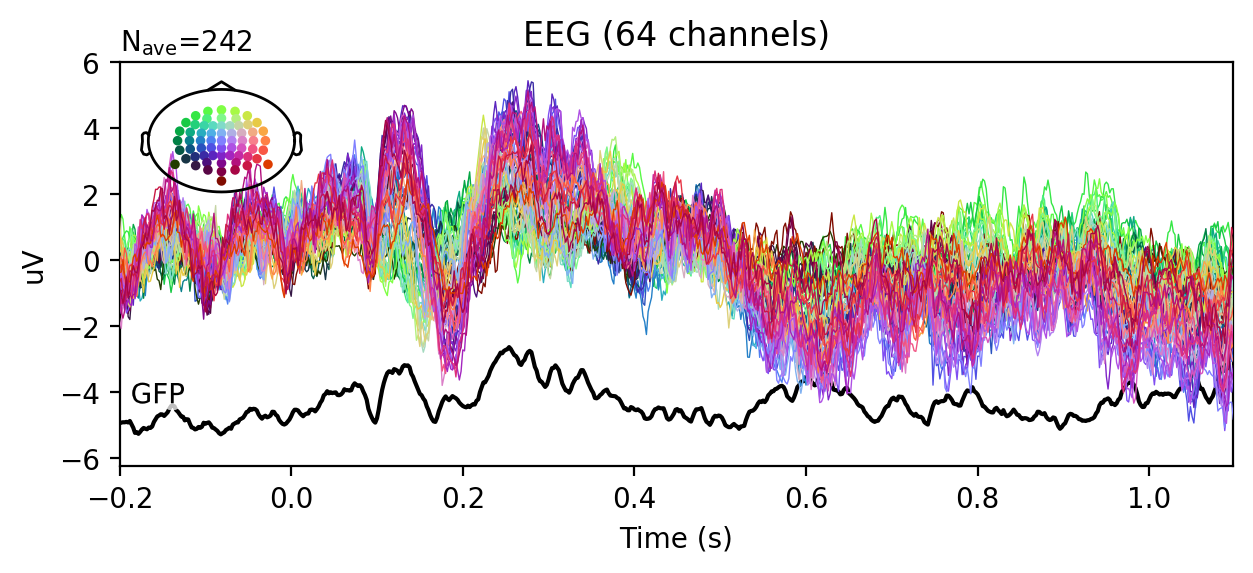

In [208]:
evoked_short_ERP.crop(-0.2, 1.4).plot(spatial_colors=True, gfp=True)
evoked_long_ERP.crop(-0.2, 1.4).plot(spatial_colors=True, gfp=True)

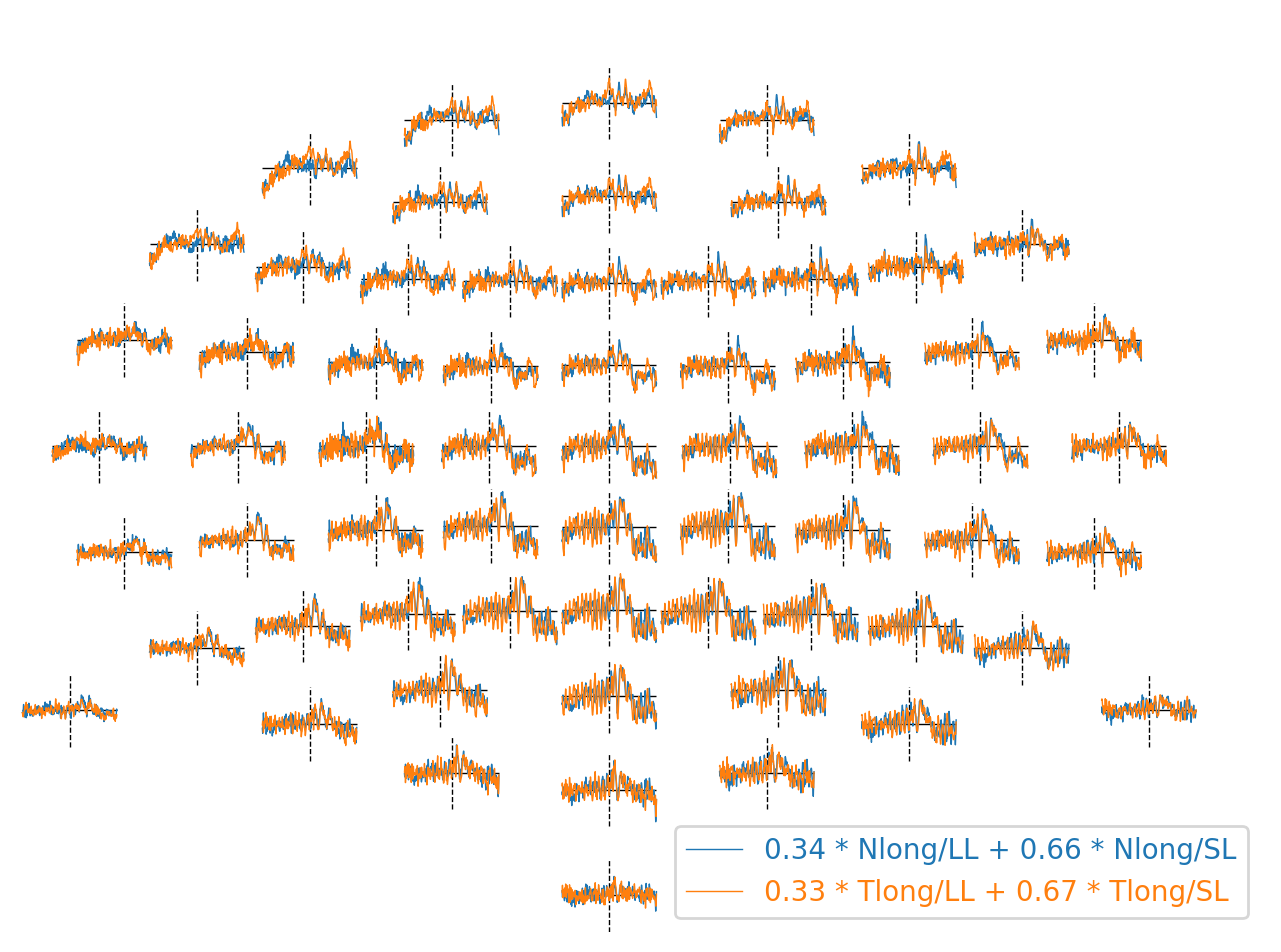

In [209]:
evokeds = [epochs_long[name].average() for name in ('Nlong', 'Tlong')]
mne.viz.plot_evoked_topo(evokeds, background_color='w')

# Load epochs from all participants

In [254]:
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/'# + nameFile + '_VFPlong-epo.fif'

evokeds_Tlong = list()
evokeds_Nlong = list()
evokeds_TlongSL = list()
evokeds_TlongLL = list()
evokeds_NlongSL = list()
evokeds_NlongLL = list()

evokeds_Tshort = list()
evokeds_Nshort = list()
evokeds_TshortSS = list()
evokeds_TshortLS = list()
evokeds_NshortSS = list()
evokeds_NshortLS = list()

evokeds_Tlong_alpha = list()
evokeds_Nlong_alpha = list()
evokeds_TlongSL_alpha = list()
evokeds_TlongLL_alpha = list()
evokeds_NlongSL_alpha = list()
evokeds_NlongLL_alpha = list()

evokeds_Tshort_alpha = list()
evokeds_Nshort_alpha = list()
evokeds_TshortSS_alpha = list()
evokeds_TshortLS_alpha = list()
evokeds_NshortSS_alpha = list()
evokeds_NshortLS_alpha = list()

baseline = (-1., 0.)
method='median'

from scipy.signal import hilbert
import os

for file in os.listdir(myPath):
    if file.endswith("_VFPlong-epo.fif"):
        fname = os.path.join(file)
        epochs = mne.read_epochs(myPath+fname, preload=True)
        epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)

        evokeds_Tlong.append(epochs['Tlong'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_Nlong.append(epochs['Nlong'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TlongLL.append(epochs['Tlong/LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TlongSL.append(epochs['Tlong/SL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NlongLL.append(epochs['Nlong/LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NlongSL.append(epochs['Nlong/SL'].apply_baseline(baseline=baseline).average(method=method))        
        
        evokeds_Tlong_alpha.append(epochs_alpha['Tlong'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_Nlong_alpha.append(epochs_alpha['Nlong'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TlongLL_alpha.append(epochs_alpha['Tlong/LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TlongSL_alpha.append(epochs_alpha['Tlong/SL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NlongLL_alpha.append(epochs_alpha['Nlong/LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NlongSL_alpha.append(epochs_alpha['Nlong/SL'].apply_baseline(baseline=baseline).average(method=method))
        
                              
    elif file.endswith("_VFPshort-epo.fif"):
        fname = os.path.join(file)
        epochs = mne.read_epochs(myPath+fname, preload=True) 
        epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)

        evokeds_Tshort.append(epochs['Tshort'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_Nshort.append(epochs['Nshort'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TshortSS.append(epochs['Tshort/SS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TshortLS.append(epochs['Tshort/LS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NshortSS.append(epochs['Nshort/SS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NshortLS.append(epochs['Nshort/LS'].apply_baseline(baseline=baseline).average(method=method))
        
        evokeds_Tshort_alpha.append(epochs_alpha['Tshort'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_Nshort_alpha.append(epochs_alpha['Nshort'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TshortSS_alpha.append(epochs_alpha['Tshort/SS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_TshortLS_alpha.append(epochs_alpha['Tshort/LS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NshortSS_alpha.append(epochs_alpha['Nshort/SS'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_NshortLS_alpha.append(epochs_alpha['Nshort/LS'].apply_baseline(baseline=baseline).average(method=method))
        

Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub1_VFPshort-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     498.00 ms
        0 CTF compensation matrices available
239 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)



<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub4_VFPlong-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...    1098.00 ms
        0 CTF compensation matrices available
215 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub2_VFPlong-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...    1098.00 ms
        0 CTF compensation matrices available
236 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub3_VFPshort-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     498.00 ms
        0 CTF compensation matrices available
224 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub2_VFPshort-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     498.00 ms
        0 CTF compensation matrices available
237 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub6_VFPlong-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...    1098.00 ms
        0 CTF compensation matrices available
242 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

<ipython-input-254-8b8451e825f8>:61: RuntimeWarning: filter_length (825) is longer than the signal (800), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12).apply_hilbert(envelope = True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


### GFPs per conditions

In [243]:
mne.viz.plot_compare_evokeds(dict(T400ms = mne.grand_average(evokeds_Tshort).crop(-0.4, 0.4),
                            N400ms = mne.grand_average(evokeds_Nshort).crop(-0.4, 0.4)))

mne.viz.plot_compare_evokeds(dict(T1000ms = mne.grand_average(evokeds_Tlong).crop(-0.4, 1.),
                                N1000ms = mne.grand_average(evokeds_Nlong).crop(-0.4, 1.)))

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
combining channels using "gfp"
combining channels using "gfp"
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 1600x1200 with 1 Axes>]

### Compare ERPs between conditions Temporal/Neutral

In [251]:
fig, ax = plt.subplots(6, 2, figsize=(8, 2))
kwargs = dict(times=[0.1, 0.3, 0.5, 0.7], show=False, vmin=-5, vmax=5, time_unit='ms')
mne.grand_average(evokeds_Tshort).plot_topomap(axes=ax[0], colorbar=True, **kwargs)
mne.grand_average(evokeds_Nshort).plot_topomap(axes=ax[1], colorbar=True, **kwargs)
mne.grand_average(evokeds_Tlong).plot_topomap(axes=ax[2], colorbar=True, **kwargs)
mne.grand_average(evokeds_Nlong).plot_topomap(axes=ax[3], colorbar=True, **kwargs)
for ax, title in zip(ax[:4], ['Tshort', 'Nshort', 'Tlong', 'Nlong']):
    ax.set_title(title)

plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.


ValueError: Times should be between -1.100 and 0.498.

[<Evoked  |  '0.32 * Tlong/LL + 0.68 * Tlong/SL' (average, N=111), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 <Evoked  |  '0.34 * Tlong/LL + 0.66 * Tlong/SL' (average, N=119), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 <Evoked  |  '0.36 * Tlong/LL + 0.64 * Tlong/SL' (average, N=117), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 <Evoked  |  '0.34 * Tlong/LL + 0.66 * Tlong/SL' (average, N=114), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 <Evoked  |  '0.30 * Tlong/LL + 0.70 * Tlong/SL' (average, N=111), [-1.1, 1.098] sec, 64 ch, ~720 kB>]

#### ERPs at Oz and C3 - Comparison of the Cues and Durations

In [252]:
plt.close('all')

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

linewidth = 1
ylim = dict(eeg=[-4,6])
ylimD = dict(eeg=[-4,6])

cropStart, cropFinish = -0.5, 1.

av_Tlong = mne.grand_average(evokeds_Tlong).crop(cropStart, cropFinish)
av_Nlong = mne.grand_average(evokeds_Nlong).crop(cropStart, cropFinish)
av_Tshort = mne.grand_average(evokeds_Tshort).crop(cropStart, cropFinish)
av_Nshort = mne.grand_average(evokeds_Nshort).crop(cropStart, cropFinish)

evokeds_diffLong = mne.combine_evoked([mne.grand_average(evokeds_Tlong).crop(cropStart, cropFinish),
                                       -mne.grand_average(evokeds_Nlong).crop(cropStart, cropFinish)],
                                      weights='equal')
evokeds_diffShort = mne.combine_evoked([mne.grand_average(evokeds_Tshort).crop(cropStart, cropFinish),
                                        -mne.grand_average(evokeds_Nshort).crop(cropStart, cropFinish)],
                                       weights='equal')

kwargs = dict(legend=None, show_sensors=False)
styles={"Difference": {"linewidth": 1}}
styles={"Difference": {"linewidth": 1}}


picks = ['Oz','O1', 'O2']

mne.viz.plot_compare_evokeds(dict(Temporal_1000ms=av_Tlong, Neutral_1000ms=av_Nlong), ylim=ylim, axes=axes[0,0],
                             picks = picks, legend='upper left', show_sensors=False, ci = False,
                             styles={"Temporal_1000ms": {"linewidth": 1},"Neutral_1000ms": {"linewidth": linewidth}})
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diffLong), ylim=ylim, axes=axes[1,0],
                             picks = picks, **kwargs, ci = False, styles={"Difference": {"linewidth": linewidth}})

mne.viz.plot_compare_evokeds(dict(Temporal_400ms=av_Tshort, Neutral_400ms=av_Nshort), ylim=ylim, axes=axes[0,2],
                             picks = picks, legend='upper left', show_sensors=False, ci = False,
                             styles={"Temporal_400ms": {"linewidth": 1},"Neutral_400ms": {"linewidth": linewidth}})
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diffShort), ylim=ylimD, axes=axes[1,2],
                             picks = picks, **kwargs, ci = False, styles={"Difference": {"linewidth": linewidth}})

picks = ['C3']

mne.viz.plot_compare_evokeds(dict(Temporal_1000ms=av_Tlong, Neutral_1000ms=av_Nlong), ylim=ylim, axes=axes[0,1],
                             picks = picks, **kwargs, ci = False,
                             styles={"Temporal_1000ms": {"linewidth": 1},"Neutral_1000ms": {"linewidth": linewidth}})
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diffLong), ylim=ylim, axes=axes[1,1],
                             picks = picks, **kwargs, ci = False, styles={"Difference": {"linewidth": linewidth}})

mne.viz.plot_compare_evokeds(dict(Temporal_400ms=av_Tshort, Neutral_400ms=av_Nshort), ylim=ylim, axes=axes[0,3],
                             picks = picks, **kwargs, ci = False,
                             styles={"Temporal_400ms": {"linewidth": 1},"Neutral_400ms": {"linewidth": linewidth}})
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diffShort), ylim=ylimD, axes=axes[1,3],
                             picks = picks, **kwargs, ci = False, styles={"Difference": {"linewidth": linewidth}})

# Set x (time) limits
# axes[0,1].set(ylim=[-2, 2], xlim=[-0.2, 0.2])
# axes[evoked_idx].set(ylim=[-225, 225], xlim=[-0.2, 0.5])


plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


In [256]:
### Plot Alpha at Oz and C3
plt.close('all')

picks = ['Oz']
linewidth = 1
ylim = dict(eeg=[-1,1])

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong_alpha), -mne.grand_average(evokeds_Nlong_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Long=evokeds_Tlong_alpha, Neutral_Long=evokeds_Nlong_alpha), ylim=ylim, axes=ax[0,0],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,0],
                             picks = picks, legend='upper left', show_sensors='upper right')

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort_alpha), -mne.grand_average(evokeds_Nshort_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Short=evokeds_Tshort_alpha, Neutral_Short=evokeds_Nshort_alpha), ylim=ylim, axes=ax[0,1],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,1],
                             picks = picks, legend='upper left', show_sensors='upper right')


evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong_alpha), -mne.grand_average(evokeds_Nlong_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Long=evokeds_Tlong_alpha, Neutral_Long=evokeds_Nlong_alpha), ylim=ylim, axes=ax[0,0],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,0],
                             picks = picks, legend='upper left', show_sensors='upper right')

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort_alpha), -mne.grand_average(evokeds_Nshort_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Short=evokeds_Tshort_alpha, Neutral_Short=evokeds_Nshort_alpha), ylim=ylim, axes=ax[0,1],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,1],
                             picks = picks, legend='upper left', show_sensors='upper right')

plt.show()

################

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
picks = ['C3']

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong_alpha), -mne.grand_average(evokeds_Nlong_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Long=evokeds_Tlong_alpha, Neutral_Long=evokeds_Nlong_alpha), ylim=ylim, axes=ax[0,0],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,0],
                             picks = picks, legend='upper left', show_sensors='upper right')

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort_alpha), -mne.grand_average(evokeds_Nshort_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Short=evokeds_Tshort_alpha, Neutral_Short=evokeds_Nshort_alpha), ylim=ylim, axes=ax[0,1],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,1],
                             picks = picks, legend='upper left', show_sensors='upper right')


evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong_alpha), -mne.grand_average(evokeds_Nlong_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Long=evokeds_Tlong_alpha, Neutral_Long=evokeds_Nlong_alpha), ylim=ylim, axes=ax[0,0],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,0],
                             picks = picks, legend='upper left', show_sensors='upper right')

evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort_alpha), -mne.grand_average(evokeds_Nshort_alpha)], weights='equal')

mne.viz.plot_compare_evokeds(dict(Temporal_Short=evokeds_Tshort_alpha, Neutral_Short=evokeds_Nshort_alpha), ylim=ylim, axes=ax[0,1],
                             picks = picks, legend='upper left', show_sensors='upper right')
mne.viz.plot_compare_evokeds(dict(Difference=evokeds_diff), ylim=ylim, axes=ax[1,1],
                             picks = picks, legend='upper left', show_sensors='upper right')

plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are cor

In [257]:
# GFP ERP per participants + total
evokeds_sub_Tlong = dict()

for sub in range(len(evokeds_Tlong)):
    evokeds_sub_Tlong.update( {'Sub'+str(sub) : evokeds_Tlong[sub]} )

evokeds_sub_Tlong.update({'Total' : evokeds_Tlong})

mne.viz.plot_compare_evokeds(evokeds_sub_Tlong, legend='upper left', show_sensors='upper right')


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


{'Sub0': <Evoked  |  '0.32 * Tlong/LL + 0.68 * Tlong/SL' (average, N=111), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Sub1': <Evoked  |  '0.34 * Tlong/LL + 0.66 * Tlong/SL' (average, N=119), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Sub2': <Evoked  |  '0.36 * Tlong/LL + 0.64 * Tlong/SL' (average, N=117), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Sub3': <Evoked  |  '0.34 * Tlong/LL + 0.66 * Tlong/SL' (average, N=114), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Sub4': <Evoked  |  '0.33 * Tlong/LL + 0.67 * Tlong/SL' (average, N=123), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Sub5': <Evoked  |  '0.30 * Tlong/LL + 0.70 * Tlong/SL' (average, N=111), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
 'Total': [<Evoked  |  '0.32 * Tlong/LL + 0.68 * Tlong/SL' (average, N=111), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
  <Evoked  |  '0.34 * Tlong/LL + 0.66 * Tlong/SL' (average, N=119), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
  <Evoked  |  '0.36 * Tlong/LL + 0.64 * Tlong/SL' (average, N=117), [-1.1, 1.098] sec, 64 ch, ~720 kB>,
  <Evoked  | 

In [ ]:
# GFP Alpha per participants + total
evokeds_sub_Tlong = dict()

for sub in range(len(evokeds_Tlong)):
    evokeds_sub_Tlong.update( {'Sub'+str(sub) : evokeds_Tlong[sub]} )

evokeds_sub_Tlong.update({'Total' : evokeds_Tlong})

mne.viz.plot_compare_evokeds(evokeds_sub_Tlong, legend='upper left', show_sensors='upper right')



#### Topographic maps of difference (Temporal - Neutral) for short- and long-VFP separately

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


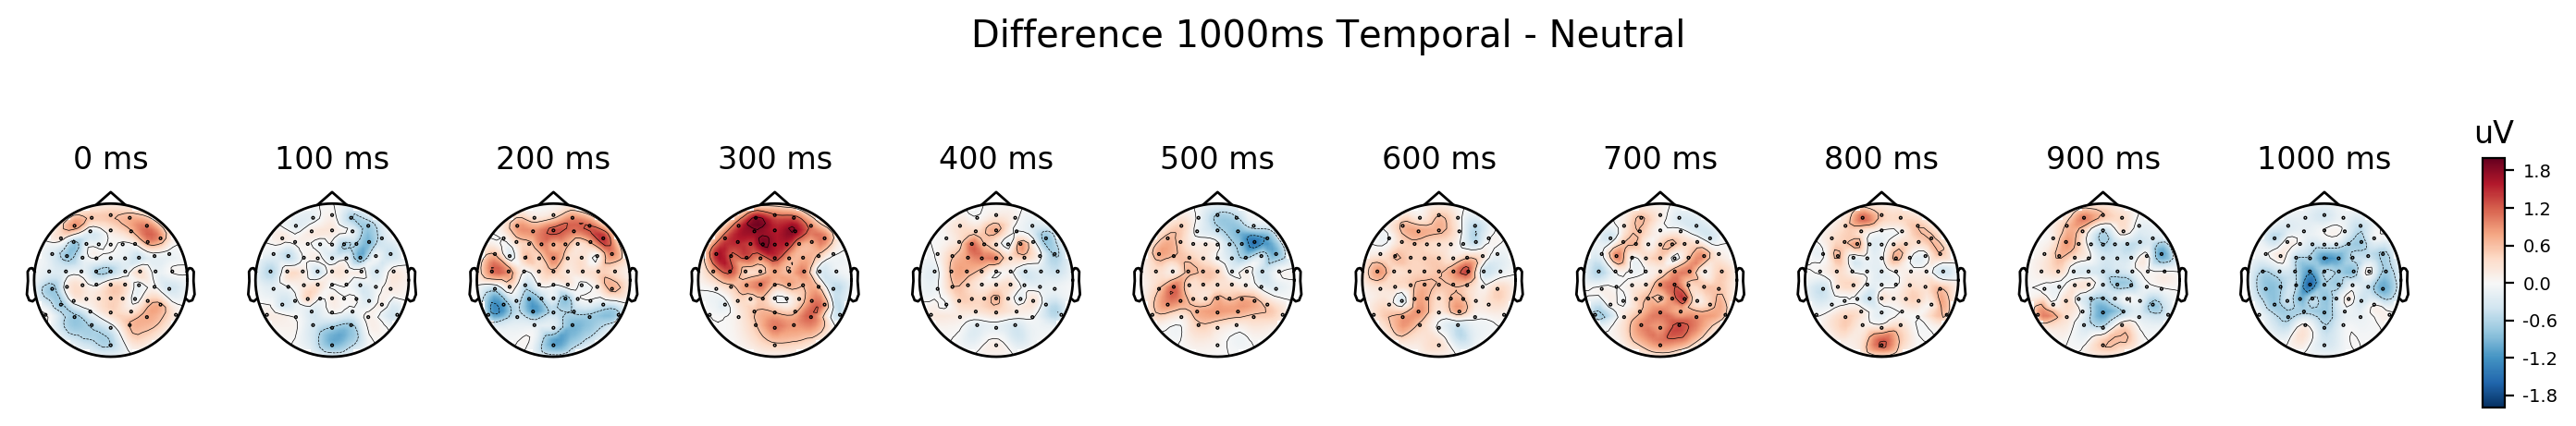

In [202]:
plt.close("all")

vmin, vmax = (-4,4)

times = [0, 0.1, 0.2, 0.3, 0.4]
kwargs = dict(show=False, res=32, time_unit='ms', extrapolate='head')

mne.grand_average(evokeds_Tshort).plot_topomap(times=times, vmin=vmin, vmax=vmax, **kwargs, title = "400 ms Temporal")
mne.grand_average(evokeds_Nshort).plot_topomap(times=times, vmin=vmin, vmax=vmax, **kwargs, title = "400 ms Neutral")
evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort), -mne.grand_average(evokeds_Nshort)], weights='equal')
evokeds_diff.plot_topomap(times=times, vmin=-2, vmax=2, **kwargs, title = "Difference 400ms Temporal - Neutral")

times = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kwargs = dict(show=False, res=32, time_unit='ms', extrapolate='head')

mne.grand_average(evokeds_Tlong).plot_topomap(times=times, vmin=vmin, vmax=vmax, **kwargs, title = "1000 ms Temporal")
mne.grand_average(evokeds_Nlong).plot_topomap(times=times, vmin=vmin, vmax=vmax, **kwargs, title = "1000 ms Neutral")
evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong), -mne.grand_average(evokeds_Nlong)], weights='equal')
evokeds_diff.plot_topomap(times=times, vmin=-2, vmax=2, **kwargs, title = "Difference 1000ms Temporal - Neutral")


In [224]:
# On a single plot for each VFP

vmin, vmax, size = (-4, 4, 0.5)
#times = [0, 0.1, 0.2, 0.3, 0.4]
#kwargs = dict(show=False, res=16, time_unit='ms', extrapolate='head')

## --- Short VFP
evoked_diff = mne.combine_evoked([mne.grand_average(evokeds_Tshort), -mne.grand_average(evokeds_Nshort)], weights='equal')

titles = ['Temporal 400 ms','Neutral 400 ms','Difference Temporal - Neutral']
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(5,4))
mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Tshort).crop(0.,0.4), size = size, title = titles[0], show=False, vmin=vmin, vmax=vmax, axes=axes[0])
# axes[0].set_title("x1");
mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Nshort).crop(0.,0.4), size = size, title = titles[1], show=False, vmin=vmin, vmax=vmax, axes=axes[1])
# axes[1].set_title("x1");
mne.viz.topomap.plot_evoked_topomap(evokeds_diff.crop(0.,0.4)  , size = size, title = titles[2], show=False, vmin=vmin, vmax=vmax, axes=axes[2])
# axes[2].set_title("x1");
fig.suptitle("Title")
plt.show()

## --- Long VFP
evoked_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong), -mne.grand_average(evokeds_Nlong)], weights='equal')
titles = ['Temporal 400 ms','Neutral 400 ms','Difference Temporal - Neutral']
fig, axes = plt.subplots(nrows=3, ncols=11, figsize=(20,4))
mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Tlong).crop(0.,1.), size = size, title = titles[0], show=False, vmin=vmin, vmax=vmax, axes=axes[0])
mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Nlong).crop(0.,1.), size = size, title = titles[1], show=False, vmin=vmin, vmax=vmax, axes=axes[1])
mne.viz.topomap.plot_evoked_topomap(evokeds_diff.crop(0.,1.) , size = size, title = titles[2], show=False, vmin=vmin, vmax=vmax, axes=axes[2])
fig.suptitle("Title")
plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-224-cee9fae5c4fc>:12: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Tshort).crop(0.,0.4), size = size, title = titles[0], show=False, vmin=vmin, vmax=vmax, axes=axes[0])
<ipython-input-224-cee9fae5c4fc>:14: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Nshort).crop(0.,0.4), size = size, title = titles[1], show=False, vmin=vmin, vmax=vmax, axes=axes[1])


Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-224-cee9fae5c4fc>:16: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(evokeds_diff.crop(0.,0.4)  , size = size, title = titles[2], show=False, vmin=vmin, vmax=vmax, axes=axes[2])
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/mne/viz/topomap.py:1809: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cax = plt.subplot(1, n_fig_axes + 1, n_fig_axes + 1)


Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-224-cee9fae5c4fc>:25: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Tlong).crop(0.,1.), size = size, title = titles[0], show=False, vmin=vmin, vmax=vmax, axes=axes[0])


Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-224-cee9fae5c4fc>:26: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(mne.grand_average(evokeds_Nlong).crop(0.,1.), size = size, title = titles[1], show=False, vmin=vmin, vmax=vmax, axes=axes[1])
<ipython-input-224-cee9fae5c4fc>:27: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  mne.viz.topomap.plot_evoked_topomap(evokeds_diff.crop(0.,1.) , size = size, title = titles[2], show=False, vmin=vmin, vmax=vmax, axes=axes[2])
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/mne/viz/topomap.py:1809: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this wa

### Create an animation

In [223]:
times = numpy.arange(0, 1, 0.001)

#mne.grand_average(evokeds_Nshort).animate_topomap(times=times, frame_rate=100, time_unit='ms')

#mne.grand_average(evokeds_Nlong).animate_topomap(times=times, frame_rate=100, time_unit='ms')
mne.grand_average(evokeds_Tlong).animate_topomap(times=times, frame_rate=100, time_unit='ms')

Identifying common channels ...
all channels are corresponding, nothing to do.


(<Figure size 1280x960 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1dc68f8b50>)

Initializing animation...
Initializing animation...
Initializing animation...


In [222]:
# Separate animations
evoked_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong), -mne.grand_average(evokeds_Nlong)], weights='equal')

times = numpy.arange(0, 1, 0.001)
# evoked_diff
mne.grand_average(evokeds_Tlong).animate_topomap(times=times, frame_rate=100, time_unit='ms')
mne.grand_average(evokeds_Nlong).animate_topomap(times=times, frame_rate=100, time_unit='ms')
evoked_diff.animate_topomap(times=times, frame_rate=100, time_unit='ms')


Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


(<Figure size 1280x960 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1dbc8c3b90>)

Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...


In [29]:
times = numpy.arange(0, 1, 0.001)
evoked_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong), -mne.grand_average(evokeds_Nlong)], weights='equal')
evoked_diff.animate_topomap(times=times, frame_rate=100, time_unit='ms')



Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


(<Figure size 1280x960 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1c4d93b6d0>)

Initializing animation...
Initializing animation...
Initializing animation...


/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/mne/viz/topomap.py:2374: UserWarning: No contour levels were found within the data range.
  cont = ax.contour(Xi, Yi, Zi, levels=cont_lims, colors='k', linewidths=1)


In [31]:
evokeds_diff = mne.combine_evoked([mne.grand_average(evokeds_Tlong), -mne.grand_average(evokeds_Nlong)], weights='equal')
evokeds = [evokeds_Tlong, evokeds_Nlong, evokeds_diff]

fig, axes = plt.subplots(1, len(evokeds))
for evoked, ax in zip(evokeds, axes):
    evoked.plot_topomap(axes=ax)

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


AttributeError: 'list' object has no attribute 'plot_topomap'

In [ ]:
# fname = '/Users/francoisfoerster/Desktop/topoAnimation.gif'
# times = numpy.arange(0, 1, 0.001)
# anim = mne.grand_average(evoked_Nlong).animate_topomap(times=times, frame_rate=100, time_unit='ms', show = False)
# anim.save(fname, writer='imagemagick')

#### Subset of electrodes

In [41]:
evokeds_TshortLS

[<Evoked  |  'Tshort/LS' (average, N=79), [-1.1, 0.498] sec, 64 ch, ~570 kB>,
 <Evoked  |  'Tshort/LS' (average, N=79), [-1.1, 0.498] sec, 64 ch, ~570 kB>,
 <Evoked  |  'Tshort/LS' (average, N=77), [-1.1, 0.498] sec, 64 ch, ~570 kB>,
 <Evoked  |  'Tshort/LS' (average, N=76), [-1.1, 0.498] sec, 64 ch, ~570 kB>]

## Sequence Effect
#### Topographic maps of difference (Temporal - Neutral) for short- and long-VFP separately

In [57]:
plt.close("all")
vmin, vmax, size = (-4, 4, 0.5)

## --- Short VFP

times = [0, 0.1, 0.2, 0.3, 0.4]
evokeds_difflT = mne.combine_evoked([mne.grand_average(evokeds_TshortSS), -mne.grand_average(evokeds_TshortLS)], weights='equal')
evokeds_difflN = mne.combine_evoked([mne.grand_average(evokeds_NshortSS), -mne.grand_average(evokeds_NshortLS)], weights='equal')
evokeds_diffCues = mne.combine_evoked((evokeds_difflN, -evokeds_difflT), weights='equal')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(5,4))

mne.viz.topomap.plot_evoked_topomap(evokeds_difflT.crop(0,0.4), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[0], title = "400 ms Temporal (top) Neutral (bottom) Cues | Same - Different")
mne.viz.topomap.plot_evoked_topomap(evokeds_difflN.crop(0,0.4), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[1])
mne.viz.topomap.plot_evoked_topomap(evokeds_diffCues.crop(0,0.4), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[2])

plt.show()

## --- Long VFP

times = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
evokeds_difflT = mne.combine_evoked([mne.grand_average(evokeds_TlongLL), -mne.grand_average(evokeds_TlongSL)], weights='equal')
evokeds_difflN = mne.combine_evoked([mne.grand_average(evokeds_NlongLL), -mne.grand_average(evokeds_NlongSL)], weights='equal')
evokeds_diffCues = mne.combine_evoked((evokeds_difflN, -evokeds_difflT), weights='equal')

fig, axes = plt.subplots(nrows=3, ncols=11, figsize=(11,4))
mne.viz.topomap.plot_evoked_topomap(evokeds_difflT.crop(0,1), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[0], title = "1000 ms Temporal (top) Neutral (bottom) Cues | Same - Different")
mne.viz.topomap.plot_evoked_topomap(evokeds_difflN.crop(0,1), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[1])
mne.viz.topomap.plot_evoked_topomap(evokeds_diffCues.crop(0,1), size = size, show=False, vmin=vmin, vmax=vmax,
                                    axes=axes[2])
plt.show()


### Hypothesis:
# We should see an effect with the neutral cues only,
# reflecting the implicit processing information of the previous trial to guide the current hazard

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-57-535dd67e7808>:14: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  axes=axes[0], title = "400 ms Temporal (top) Neutral (bottom) Cues | Same - Different")
<ipython-input-57-535dd67e7808>:16: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  axes=axes[1])


Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<ipython-input-57-535dd67e7808>:18: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  axes=axes[2])
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/mne/viz/topomap.py:1809: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cax = plt.subplot(1, n_fig_axes + 1, n_fig_axes + 1)
<ipython-input-57-535dd67e7808>:31: RuntimeWarning: Colorbar is drawn to the rightmost column of the figure. Be sure to provide enough space for it or turn it off with colorbar=False.
  axes=axes[0], title = "1000 ms Temporal (top) Neutral (bottom) Cues | Same - Different")
<ipython-input-57-535dd67e7808>:33: Runtim

# Time-Frequency analysis
## Amplitude/Power analysis

<ipython-input-227-0e7d1095c8e3>:3: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs.crop(0,1).plot_psd(fmin=6., fmax=30., average=True, spatial_colors=False)


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-227-0e7d1095c8e3>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs.crop(0,1).plot_psd_topomap(normalize=True)


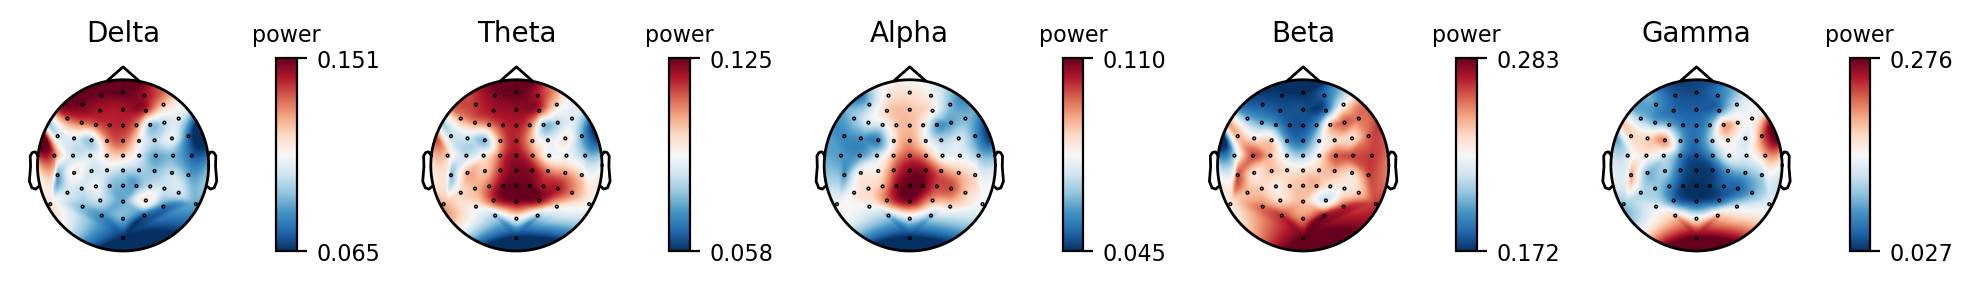

In [227]:
# Explore the frequency distribution

epochs.crop(0,1).plot_psd(fmin=6., fmax=30., average=True, spatial_colors=False)
epochs.crop(0,1).plot_psd_topomap(normalize=True)

In [228]:

vmin, vmax = (-1,1)
times = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
raw_Alpha['Tlong'].copy().average().plot_topomap(times=times, vmin=vmin, vmax=vmax)
raw_Alpha['Nlong'].copy().average().plot_topomap(times=times, vmin=vmin, vmax=vmax)



NameError: name 'raw_Alpha' is not defined

In [236]:
plt.close('all')
freqs = np.arange(14., 26., 0.5)
vmin, vmax = -3., 3.  # Define our color limits.

n_cycles = freqs / 2.
time_bandwidth = 2.0  # Least possible frequency-smoothing (1 taper)
power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, return_itc=True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


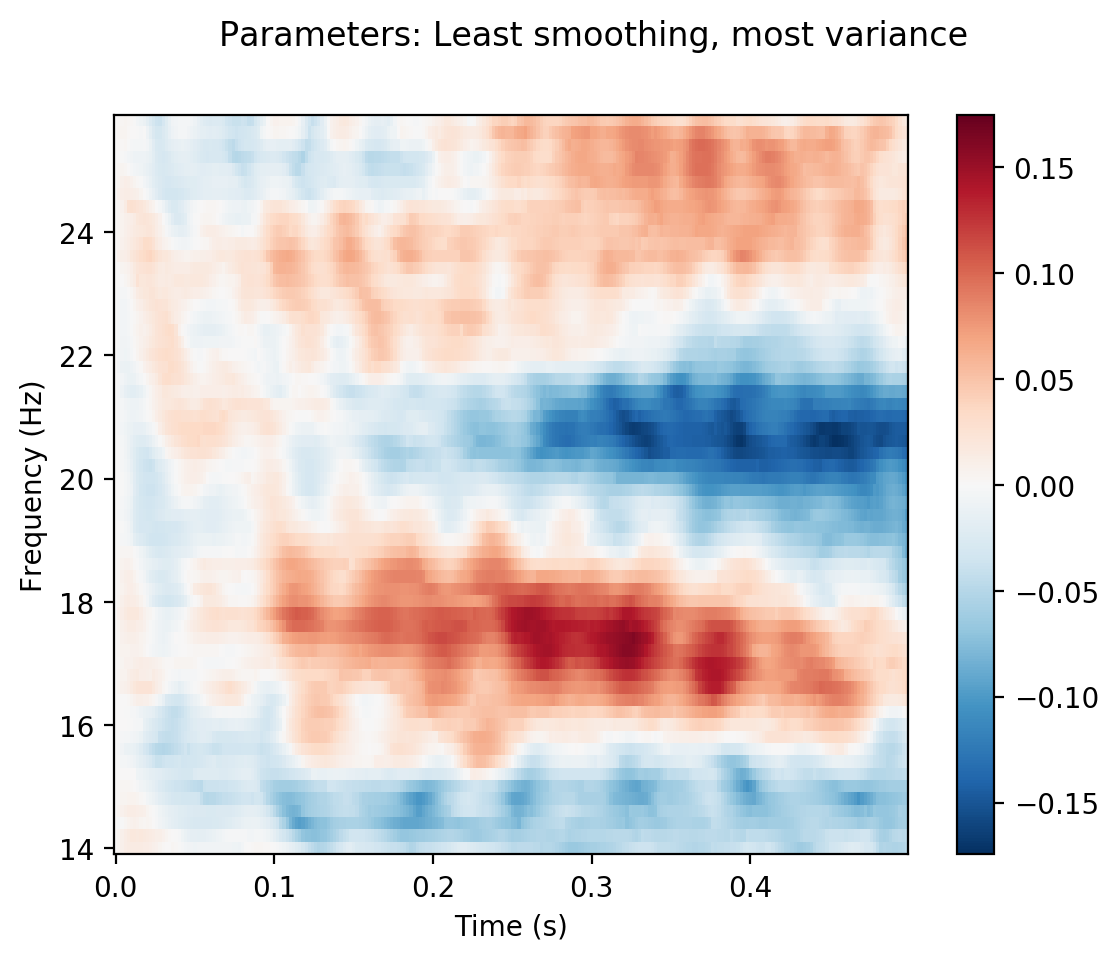

In [240]:
power.crop(-0.2, 1.).plot([0], baseline=baseline, mode='mean', title='Parameters: Least smoothing, most variance')
itc.crop(-0.2, 1.).plot([0], baseline=baseline, mode='mean', title='Parameters: Least smoothing, most variance')



In [ ]:
freqs = np.arange(8., 30., 0.5)

vmin, vmax = -3., 3.  # Define our color limits.

n_cycles = freqs / 2.
power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False)
print(type(power))

avgpower = power.average()
avgpower.crop(-0.2, 1.).plot([0], baseline=baseline, mode='mean', title='Using Morlet wavelets and EpochsTFR', show=False)

## Phase analysis

In [ ]:
mne.apply_hilbert?



In [241]:
evoked_ERP.plot(spatial_colors=True)

NameError: name 'evoked_ERP' is not defined

In [ ]:
evoked_Alpha.plot(spatial_colors=True)

In [ ]:
epochs_band = epochs.copy().pick_channels(ch_names = ['Oz'])
epochs_band.filter(8, 13, l_trans_bandwidth=3.5, h_trans_bandwidth=3.5,
                fir_design='firwin')
epochs_hilb = epochs_band.copy()
hilb_picks = mne.pick_types(epochs_band.info, meg=False, eeg=True)
epochs_hilb.apply_hilbert(hilb_picks)
print(epochs_hilb)
epochs_hilb.plot()

In [ ]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

epochs = epochs_short.copy()

raw_band = epochs.copy().pick_channels(ch_names = ['Oz'])
raw_band.filter(12, 18, l_trans_bandwidth=2., h_trans_bandwidth=2.,
                fir_design='firwin')
raw_hilb = raw_band.copy()
hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
raw_hilb.apply_hilbert(hilb_picks)

#print(raw_hilb[0][0].dtype)

###############################################################################
# Finally, it is possible to apply arbitrary functions to your data to do
# what you want. Here we will use this to take the amplitude and phase of
# the hilbert transformed data.
#
# .. note:: You can also use ``envelope=True`` in the call to
#           :meth:`mne.io.Raw.apply_hilbert` to do this automatically.
#


# Take the amplitude and phase
raw_amp = raw_hilb.copy()
raw_amp.apply_function(np.abs, hilb_picks)
raw_phase = raw_hilb.copy()
raw_phase.apply_function(np.angle, hilb_picks)

_, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
a1.plot(raw_band[hilb_picks[0]][0][0].real)
a1.plot(raw_amp[hilb_picks[0]][0][0].real)
a2.plot(raw_phase[hilb_picks[0]][0][0].real)
a1.set_title('Amplitude of frequency band')
a2.set_title('Phase of frequency band')

In [ ]:
from scipy.signal import hilbert
import numpy as np
from matplotlib.pyplot import plot


def transform_epochs(epochs, f, **kwargs):
    '''Perform an arbitrary transformation on the epochs data'''
    epochs._data = f(epochs._data, **kwargs)
    return epochs


epochs_Hilb = transform_epochs(epochs, hilbert)

print(epochs_Hilb)




#sensor = np.loadtxt('signal.txt')
# plot(epochs)
# analytical_signal = hilbert(epochs)
# plot(analytical_signal.real)
# plot(analytical_signal.imag)

# amplitude_envelope = np.abs(analytical_signal)
# plot(amplitude_envelope)



In [ ]:
conditions = ["evoked_Nlong", "evoked_Tlong", "evoked_Nshort", "evoked_Tshort"]
evoked_dict = dict()
# evoked_dict = conditions
evoked_dict = [evoked_Nlong, evoked_Tlong, evoked_Nshort, evoked_Tshort]

# for condition in conditions:
#     evoked_dict[condition.replace(" ", "/")] = mne.read_evokeds(
#         fname, baseline=(None, 0), proj=True, condition=condition)
print(evoked_dict)

colors = dict("evoked_Nlong"="Crimson",         "evoked_Tlong"="Crimson",
              "evoked_Nshort"="CornFlowerBlue", "evoked_Tshort"="CornFlowerBlue")
linestyles = dict(evoked_Nlong='-',  evoked_Tlong='--',
                  evoked_Nshort='-', evoked_Tshort='--')

mne.viz.plot_compare_evokeds(evoked_dict, picks=("C3"), linestyles=linestyles, colors=colors, split_legend=True)


In [ ]:
mne.viz.plot_compare_evokeds?